# Snorkel Validation 2
In this notebook, our goal is to validate the Snorkel labeling process. The previous notebook used three labeling functions, two of which appeared to not classify the articles well. In this exercise, we will perform the same work with four other labeling functions. Then we will join all of the labeling functions together and perform a joint analysis.

### Compute semantic similarity scores

In [1]:
from snorkel.labeling import labeling_function
from snorkel.labeling.model import LabelModel
from snorkel.labeling import PandasLFApplier
import pandas as pd
from sentence_transformers import SentenceTransformer, util

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
df_defi = pd.read_excel("data/research_defs.xlsx")
df = pd.read_csv("data/text-classification-train.csv")
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [3]:
df_labeled = pd.DataFrame()
df_labeled['abstract'] = df['ABSTRACT'][:200] # Make the labeled only the first 200

computer_science = 1 # Identified as a CS research article
ABSTAIN = 0 # Not identified as a CS research article

i=0

In [41]:
df_defi['Definition'].iloc[i]

'Computer science is the study of computers and computing, including their theoretical and algorithmic foundations, hardware and software, and their uses for processing information. The discipline of computer science includes the study of algorithms and data structures, computer and network design, modeling data and information processes, and artificial intelligence.'

In [5]:
def lf_def_4_score(x):
  i = 0
  embedder = SentenceTransformer('all-mpnet-base-v2')
  list_key = df_defi['Definition'].iloc[i]
  def_embedding = embedder.encode(list_key, convert_to_tensor=True)
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding, corpus_embeddings)[0]
  return score

def lf_def_5_score(x):
  i = 0
  embedder = SentenceTransformer('all-distilroberta-v1')
  list_key = df_defi['Definition'].iloc[i]
  def_embedding = embedder.encode(list_key, convert_to_tensor=True)
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding, corpus_embeddings)[0]
  return score

def lf_def_6_score(x):
  i = 0
  embedder = SentenceTransformer('multi-qa-mpnet-base-cos-v1')
  list_key = df_defi['Definition'].iloc[i]
  def_embedding = embedder.encode(list_key, convert_to_tensor=True)
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding, corpus_embeddings)[0]
  return score    

def lf_def_7_score(x):
  i = 0
  embedder = SentenceTransformer('msmarco-distilbert-base-v4')
  list_key = df_defi['Definition'].iloc[i]
  def_embedding = embedder.encode(list_key, convert_to_tensor=True)
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding, corpus_embeddings)[0]
  return score

Generate semantic similarity scores and store them in a dataframe

In [6]:
df_scores = pd.DataFrame()
df_scores['abstract'] = df_labeled['abstract']

In [7]:
df_scores['LF_4_CS'] = df_scores['abstract'].apply(lf_def_4_score)

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [9]:
df_scores['LF_5_CS'] = df_scores['abstract'].apply(lf_def_5_score)

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
df_scores['LF_6_CS'] = df_scores['abstract'].apply(lf_def_6_score)

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [13]:
df_scores['LF_7_CS'] = df_scores['abstract'].apply(lf_def_7_score)

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [14]:
df_scores.to_csv("data/snorkel_sample_2.csv")

### Compute Snorkel labels

In [6]:
df = pd.read_csv("data/snorkel_sample_2.csv")
df

,abstract,LF_4_CS,LF_5_CS,LF_6_CS,LF_7_CS
0,Predictive models allow subject-specific inf...,0.0308,0.1125,0.0064,-0.0074
1,Rotation invariance and translation invarian...,0.0320,0.1715,0.0311,0.0111
2,We introduce and develop the notion of spher...,-0.0150,-0.0234,-0.0341,0.0574
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0.0258,-0.0243,-0.0701,0.0366
4,Fourier-transform infra-red (FTIR) spectra o...,0.1249,0.1090,0.0144,-0.0800
...,...,...,...,...,...
195,We relate the concepts used in decentralized...,0.1543,0.1414,0.1987,0.1243
196,Time-varying network topologies can deeply i...,0.1365,0.1734,0.0003,-0.1047
197,A long-standing obstacle to progress in deep...,0.0307,0.0004,-0.0450,-0.0397
198,We study the band structure topology and eng...,-0.0284,0.0022,-0.1349,-0.1247


In [30]:
df_labeled = pd.DataFrame()
df_labeled['abstract'] = df['abstract']

In [28]:
@labeling_function()
def lf_def_4(x):
  score = df[df['abstract'] == x['abstract']]['LF_4_CS'].values[0]
  if score > 0.5:
   return computer_science  
  return ABSTAIN

@labeling_function()
def lf_def_5(x):
  score = df[df['abstract'] == x['abstract']]['LF_5_CS'].values[0]
  if score > 0.5:
   return computer_science  
  return ABSTAIN

@labeling_function()
def lf_def_6(x):
  score = df[df['abstract'] == x['abstract']]['LF_6_CS'].values[0]
  if score > 0.5:
   return computer_science  
  return ABSTAIN

@labeling_function()
def lf_def_7(x):
  score = df[df['abstract'] == x['abstract']]['LF_7_CS'].values[0]
  if score > 0.5:
   return computer_science  
  return ABSTAIN

In [29]:
lfs = [lf_def_4, lf_def_5, lf_def_6, lf_def_7]

In [31]:
# Apply the LFs to the unlabeled training data
applier = PandasLFApplier(lfs)
L_train = applier.apply(df_labeled)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 703.07it/s]


In [33]:
# Initialize the LabelModel
label_model = LabelModel(cardinality=2, verbose=True)

# Train the LabelModel
label_model.fit(L_train, n_epochs=500, log_freq=100, seed=123)

INFO:root:Computing O...
INFO:root:Estimating \mu...
100%|████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 411.12epoch/s]
INFO:root:Finished Training


In [34]:
# Get the predicted labels (y_train) for the data points
y_train = label_model.predict(L=L_train)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [35]:
df['Snorkel_CS'] = y_train

### Evaluating semantic similarity scores

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In order to visualize the scores, we need to melt the dataframe

In [39]:
df_scores = df[['LF_4_CS','LF_5_CS','LF_6_CS', 'LF_7_CS']]
df_melted = df_scores.melt(var_name='Column', value_name='Value')
df_melted

,Column,Value
0,LF_4_CS,0.0308
1,LF_4_CS,0.0320
2,LF_4_CS,-0.0150
3,LF_4_CS,0.0258
4,LF_4_CS,0.1249
...,...,...
795,LF_7_CS,0.1243
796,LF_7_CS,-0.1047
797,LF_7_CS,-0.0397
798,LF_7_CS,-0.1247


C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

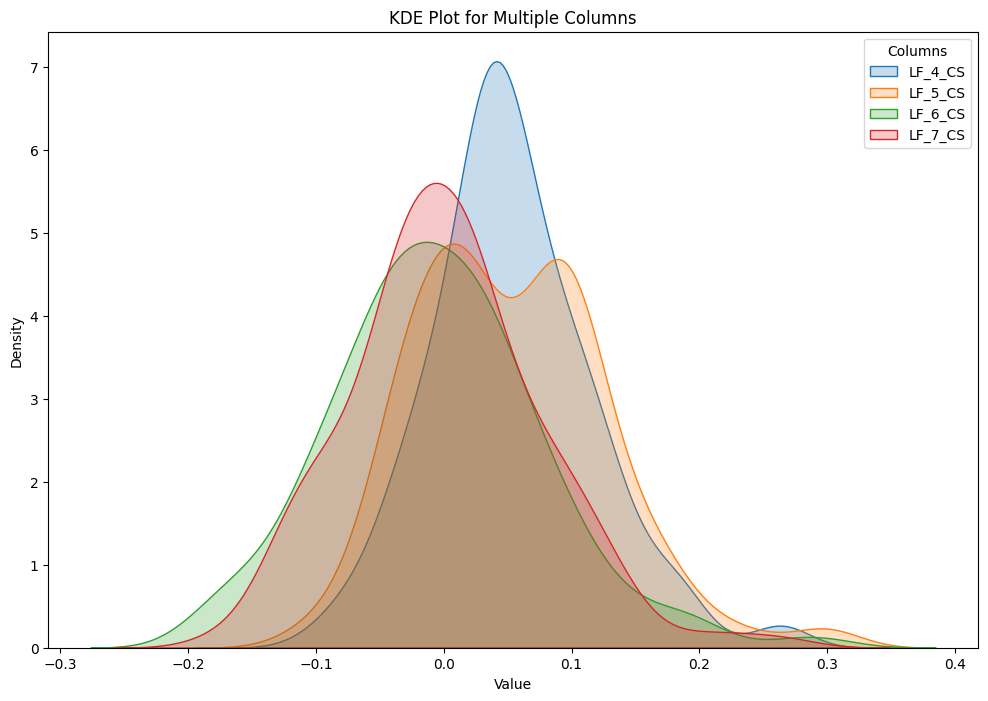

In [40]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot KDE for each column
for column in df_scores.columns:
    sns.kdeplot(df_scores[column], label=column, fill=True)

# Add titles and labels
plt.title('KDE Plot for Multiple Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Columns')
plt.show()

All of the labeling functions did not assign any research article a semantic similarity score of 0.5 or above. This result indicates that either: 1) the sentence transformers are not very good, 2) the threshold needs to be lower, 3) we need a better definition.

### Validating Snorkel

We need to bring in the actual computer science results:

In [3]:
df_labeled = pd.read_csv("data/text-classification-train.csv")
df_labeled

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [7]:
df['CS_actual'] = df_labeled['Computer Science'][:200]
df

,abstract,LF_4_CS,LF_5_CS,LF_6_CS,LF_7_CS,CS_actual
0,Predictive models allow subject-specific inf...,0.0308,0.1125,0.0064,-0.0074,1
1,Rotation invariance and translation invarian...,0.0320,0.1715,0.0311,0.0111,1
2,We introduce and develop the notion of spher...,-0.0150,-0.0234,-0.0341,0.0574,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0.0258,-0.0243,-0.0701,0.0366,0
4,Fourier-transform infra-red (FTIR) spectra o...,0.1249,0.1090,0.0144,-0.0800,1
...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,0.1543,0.1414,0.1987,0.1243,0
196,Time-varying network topologies can deeply i...,0.1365,0.1734,0.0003,-0.1047,1
197,A long-standing obstacle to progress in deep...,0.0307,0.0004,-0.0450,-0.0397,1
198,We study the band structure topology and eng...,-0.0284,0.0022,-0.1349,-0.1247,0


**Accuracy of Snorkel model**:

In [45]:
# Number of actual CS documents
len(df[df['CS_actual'] == 1])

78

In [46]:
snorkel_accuracy = len(df[df['CS_actual'] == df['Snorkel_CS']]) / len(df)
snorkel_accuracy

0.61

In [47]:
# For how many CS documents did it correctly classify as CS documents?
snorkel_pos_accuracy = len(df[(df['CS_actual'] == df['Snorkel_CS']) & (df['CS_actual'] == 1)]) / len(df)
snorkel_pos_accuracy

0.0

Snorkel classified 61% of documents correctly--however, those documents were all documents which *weren't* CS documents. Of those documents which were CS documents, it classified none correctly. This makes sense: as we saw above, no article received a semantic similarity score of 0.5 or greater.

## Putting it all together

We combine the results of `snorkel_sample_1` and `snorkel_sample_2` to get a full understanding of which models perform the best in classifying the documents. While both had the same combined result (all zero results), we might be able to understand which labeling functions performed the best.

In [14]:
df.rename(columns = {"Snorkel_CS": "Snorkel_CS_4567"}, inplace=True)

In [9]:
df_old = pd.read_csv("data/snorkel_sample.csv")
df_old

,abstract,LF_1_CS,LF_2_CS,LF_3_CS,Snorkel_CS,CS_actual
0,Predictive models allow subject-specific inf...,0.065778,0.160896,0.250593,0,1
1,Rotation invariance and translation invarian...,0.116622,-0.004507,0.422111,0,1
2,We introduce and develop the notion of spher...,0.046203,0.065532,0.324282,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,-0.021727,-0.043504,0.341957,0,0
4,Fourier-transform infra-red (FTIR) spectra o...,0.020897,-0.081648,0.355184,0,1
...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,0.229318,0.383580,0.548017,0,0
196,Time-varying network topologies can deeply i...,0.000179,0.024527,0.424461,0,1
197,A long-standing obstacle to progress in deep...,-0.008347,-0.053800,0.351851,0,1
198,We study the band structure topology and eng...,-0.037710,-0.111807,0.258891,0,0


In [10]:
df_old.rename(columns={"Snorkel_CS": "Snorkel_CS_123"}, inplace=True)

In [11]:
df_merged = pd.merge(df, df_old, how='left', on=['abstract', 'CS_actual'])

In [12]:
df_merged

,abstract,LF_4_CS,LF_5_CS,LF_6_CS,LF_7_CS,CS_actual,LF_1_CS,LF_2_CS,LF_3_CS,Snorkel_CS_123
0,Predictive models allow subject-specific inf...,0.0308,0.1125,0.0064,-0.0074,1,0.065778,0.160896,0.250593,0
1,Rotation invariance and translation invarian...,0.0320,0.1715,0.0311,0.0111,1,0.116622,-0.004507,0.422111,0
2,We introduce and develop the notion of spher...,-0.0150,-0.0234,-0.0341,0.0574,0,0.046203,0.065532,0.324282,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0.0258,-0.0243,-0.0701,0.0366,0,-0.021727,-0.043504,0.341957,0
4,Fourier-transform infra-red (FTIR) spectra o...,0.1249,0.1090,0.0144,-0.0800,1,0.020897,-0.081648,0.355184,0
...,...,...,...,...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,0.1543,0.1414,0.1987,0.1243,0,0.229318,0.383580,0.548017,0
196,Time-varying network topologies can deeply i...,0.1365,0.1734,0.0003,-0.1047,1,0.000179,0.024527,0.424461,0
197,A long-standing obstacle to progress in deep...,0.0307,0.0004,-0.0450,-0.0397,1,-0.008347,-0.053800,0.351851,0
198,We study the band structure topology and eng...,-0.0284,0.0022,-0.1349,-0.1247,0,-0.037710,-0.111807,0.258891,0


In [17]:
df_merged["Snorkel_CS_4567"] = 0
df_merged

,abstract,LF_4_CS,LF_5_CS,LF_6_CS,LF_7_CS,CS_actual,LF_1_CS,LF_2_CS,LF_3_CS,Snorkel_CS_123,Snorkel_CS_4567
0,Predictive models allow subject-specific inf...,0.0308,0.1125,0.0064,-0.0074,1,0.065778,0.160896,0.250593,0,0
1,Rotation invariance and translation invarian...,0.0320,0.1715,0.0311,0.0111,1,0.116622,-0.004507,0.422111,0,0
2,We introduce and develop the notion of spher...,-0.0150,-0.0234,-0.0341,0.0574,0,0.046203,0.065532,0.324282,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0.0258,-0.0243,-0.0701,0.0366,0,-0.021727,-0.043504,0.341957,0,0
4,Fourier-transform infra-red (FTIR) spectra o...,0.1249,0.1090,0.0144,-0.0800,1,0.020897,-0.081648,0.355184,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,0.1543,0.1414,0.1987,0.1243,0,0.229318,0.383580,0.548017,0,0
196,Time-varying network topologies can deeply i...,0.1365,0.1734,0.0003,-0.1047,1,0.000179,0.024527,0.424461,0,0
197,A long-standing obstacle to progress in deep...,0.0307,0.0004,-0.0450,-0.0397,1,-0.008347,-0.053800,0.351851,0,0
198,We study the band structure topology and eng...,-0.0284,0.0022,-0.1349,-0.1247,0,-0.037710,-0.111807,0.258891,0,0


### Joint analysis

In [69]:
df_scores = df_merged[['LF_1_CS','LF_2_CS','LF_3_CS','LF_4_CS','LF_5_CS','LF_6_CS', 'LF_7_CS']]
df_melted = df_scores.melt(var_name='Column', value_name='Value')
df_melted

,Column,Value
0,LF_1_CS,0.065778
1,LF_1_CS,0.116622
2,LF_1_CS,0.046203
3,LF_1_CS,-0.021727
4,LF_1_CS,0.020897
...,...,...
1395,LF_7_CS,0.124300
1396,LF_7_CS,-0.104700
1397,LF_7_CS,-0.039700
1398,LF_7_CS,-0.124700


C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

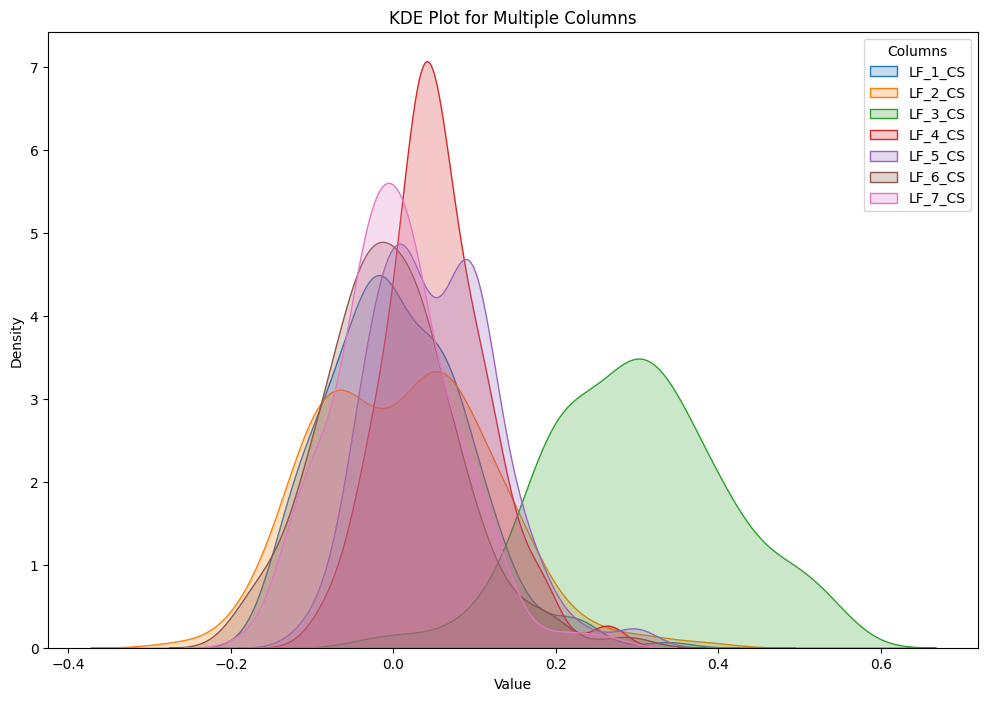

In [70]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot KDE for each column
for column in df_scores.columns:
    sns.kdeplot(df_scores[column], label=column, fill=True)

# Add titles and labels
plt.title('KDE Plot for Multiple Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Columns')
plt.show()

The third semantic similarity model, which is `bert-base-nli-stsb-mean-tokens`, clearly performs the best. The rest have scores all clustered around 0.1, with a significant portion of the distirbution falling below 0. However, even this third model appears to have very few scores greater than 0.5; we would expect the best-performing model to have roughly 40% of its distribution above 0.5 (which corresponds to the number of actual CS documents).

**How good is the best-performing model?**

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

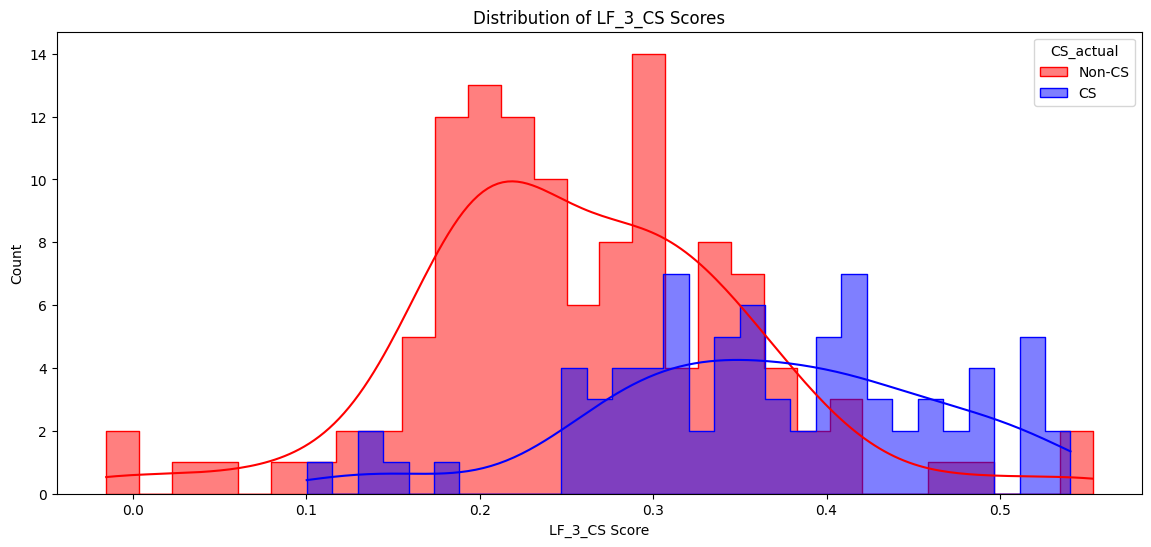

In [93]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df_merged[df_merged['CS_actual'] == 0], x='LF_3_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df_merged[df_merged['CS_actual'] == 1], x='LF_3_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_3_CS Scores')
plt.xlabel('LF_3_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


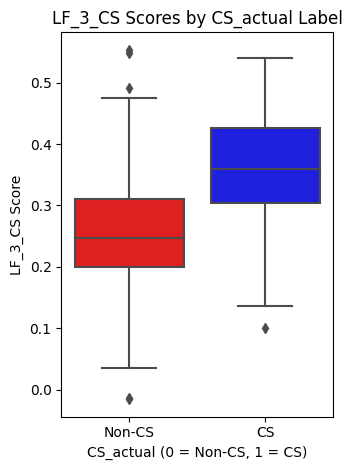

In [78]:
# Boxplot: LF_3_CS Scores by CS_actual Label
plt.subplot(1, 2, 2)
sns.boxplot(data=df_merged, x='CS_actual', y='LF_3_CS', palette={0: 'red', 1: 'blue'})
plt.title('LF_3_CS Scores by CS_actual Label')
plt.xlabel('CS_actual (0 = Non-CS, 1 = CS)')
plt.ylabel('LF_3_CS Score')
plt.xticks([0, 1], ['Non-CS', 'CS'])

plt.tight_layout()
plt.show()

These two results strongly suggest that using a threshold of 0.3 would be the best choice, instead of 0.5, like we used earlier. We can use 0.3 as the threshold and see if it would change the accuracy:

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [80]:
# Apply the threshold to create binary predictions
df_merged['Predicted_CS'] = (df_merged['LF_3_CS'] >= 0.3).astype(int)

# Calculate accuracy
accuracy = accuracy_score(df_merged['CS_actual'], df_merged['Predicted_CS'])
accuracy

0.72

In [82]:
# For how many CS documents did it correctly classify as CS documents?
snorkel_pos_accuracy = len(df_merged[(df_merged['CS_actual'] == df_merged['Predicted_CS']) & (df_merged['CS_actual'] == 1)]) / len(df_merged[df_merged['CS_actual'] == 1])
snorkel_pos_accuracy

0.782051282051282

We see an accuracy of **72%**, which is an increase from the previous accuracy of 61%. We also see a notable increase in the number of correctly classified CS documents, from 0% to 78%.

**How good are the other models?**

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

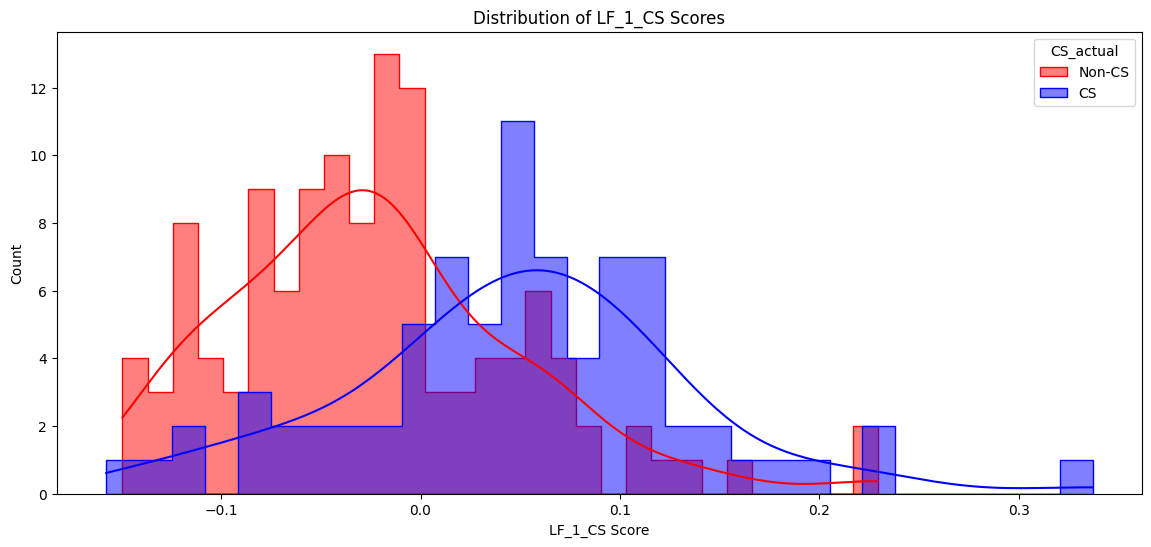

In [94]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df_merged[df_merged['CS_actual'] == 0], x='LF_1_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df_merged[df_merged['CS_actual'] == 1], x='LF_1_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_1_CS Scores')
plt.xlabel('LF_1_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

There is somewhat of a difference in the distribution of non-CS and CS, where higher semantic similarity scores tend to correspond to CS articles. However, the threshold also needs to be lower: perhaps around 0.05 or 0.1.

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

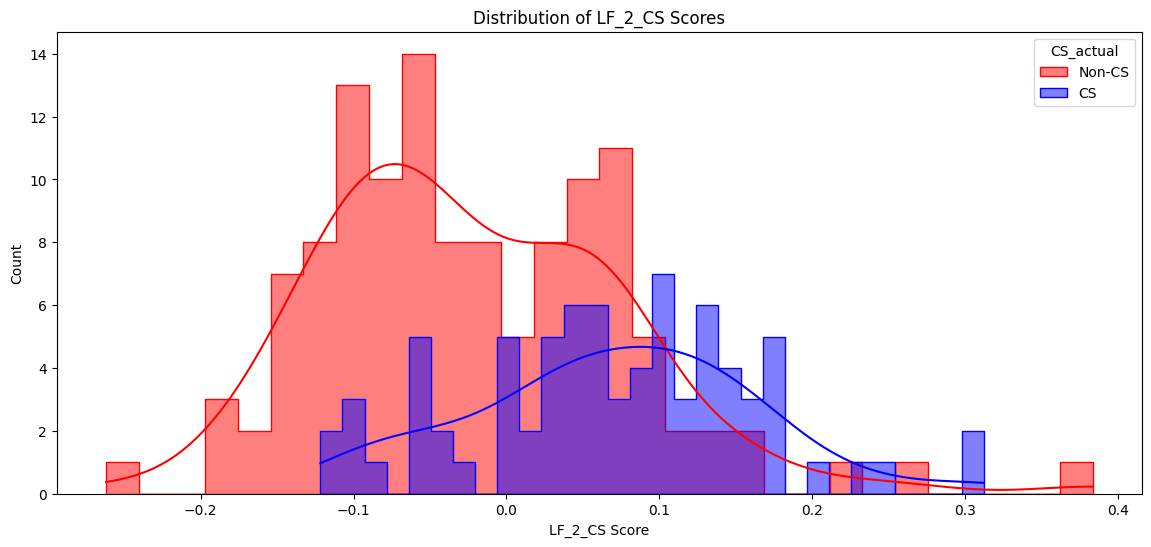

In [95]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df_merged[df_merged['CS_actual'] == 0], x='LF_2_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df_merged[df_merged['CS_actual'] == 1], x='LF_2_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_2_CS Scores')
plt.xlabel('LF_2_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

These two distributions are much closer together, making it difficult to assign a specific threshold. However, 0.1 could be a possibility.

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

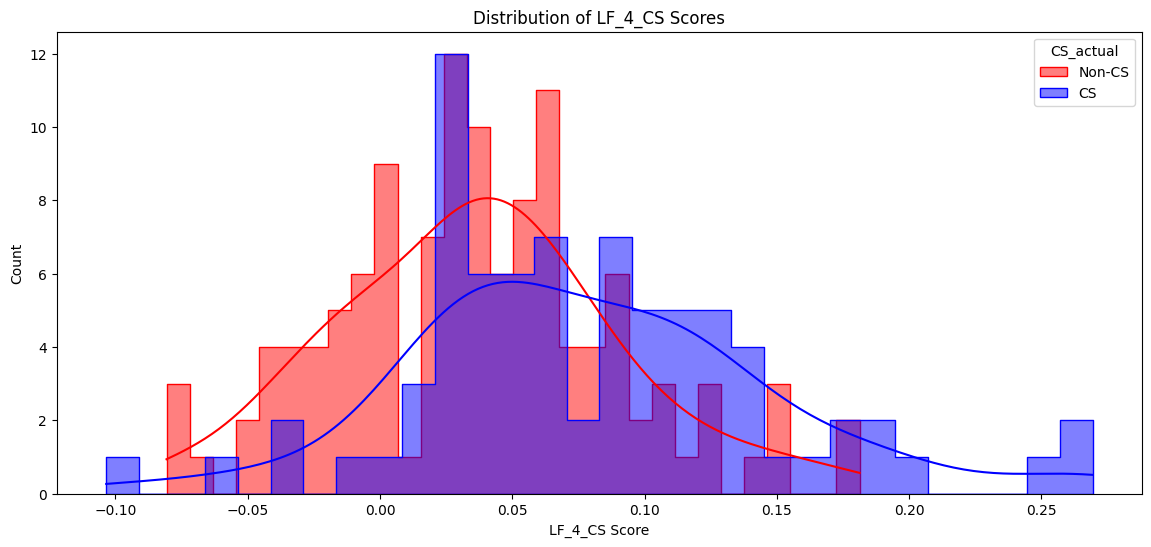

In [96]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df_merged[df_merged['CS_actual'] == 0], x='LF_4_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df_merged[df_merged['CS_actual'] == 1], x='LF_4_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_4_CS Scores')
plt.xlabel('LF_4_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

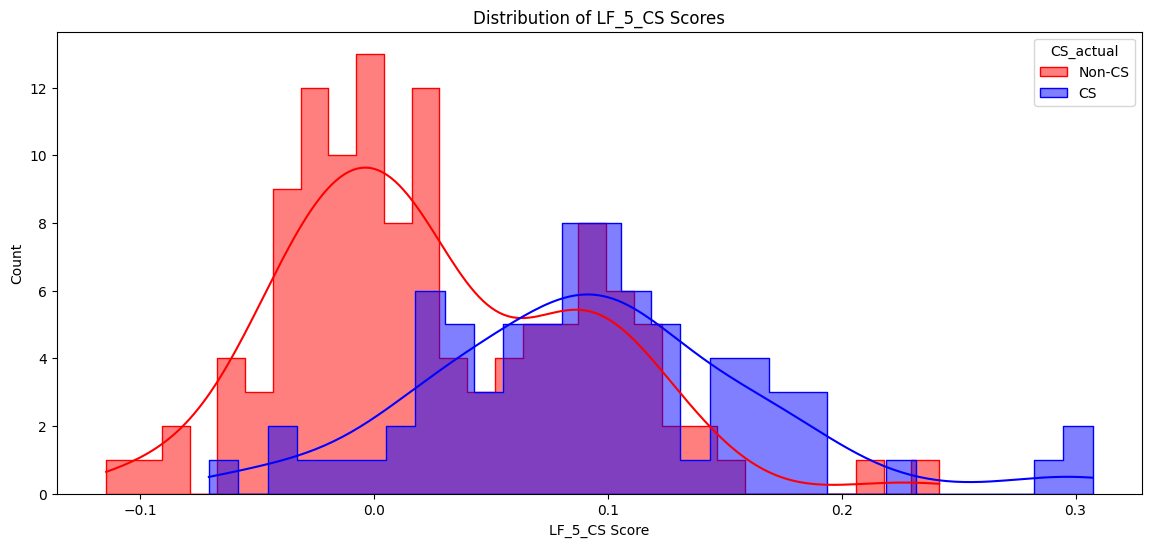

In [97]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df_merged[df_merged['CS_actual'] == 0], x='LF_5_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df_merged[df_merged['CS_actual'] == 1], x='LF_5_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_5_CS Scores')
plt.xlabel('LF_5_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

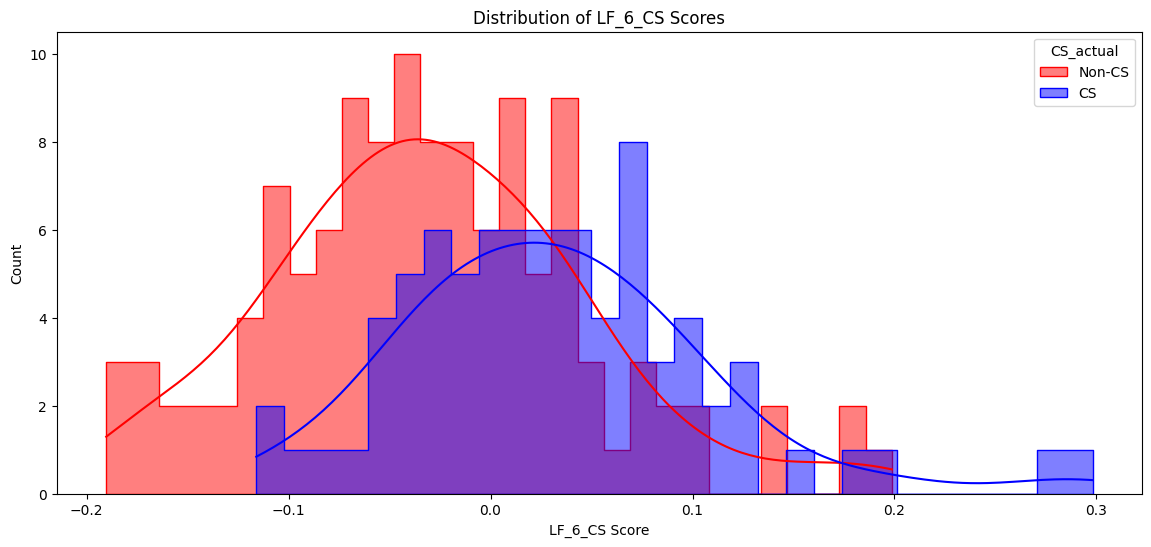

In [100]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df_merged[df_merged['CS_actual'] == 0], x='LF_6_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df_merged[df_merged['CS_actual'] == 1], x='LF_6_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_6_CS Scores')
plt.xlabel('LF_6_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

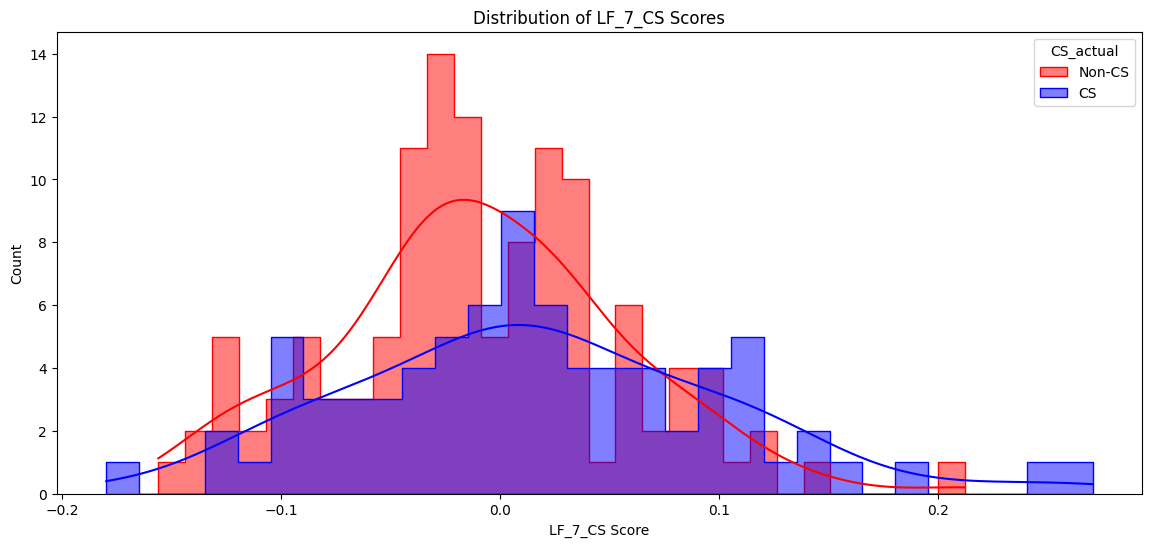

In [101]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df_merged[df_merged['CS_actual'] == 0], x='LF_7_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df_merged[df_merged['CS_actual'] == 1], x='LF_7_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_7_CS Scores')
plt.xlabel('LF_7_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

### Qualitative analysis
On the above graphs, we see a few non-CS articles with high semantic similarity scores, as well as a few CS articles with low semantic similarity scores. We look into what kinds of articles these are. We use the `LF_3_CS` embeddings model, which seems the most accurate.

In [29]:
# Filter for non-CS articles (CS_actual = 0)
non_cs_articles = df_merged[df_merged['CS_actual'] == 0]

In [30]:
# Sort by LF_3_CS in descending order and select the top 5
top_non_cs_articles = non_cs_articles.sort_values(by='LF_3_CS', ascending=False).head(5)
top_non_cs_articles

,abstract,LF_4_CS,LF_5_CS,LF_6_CS,LF_7_CS,CS_actual,LF_1_CS,LF_2_CS,LF_3_CS,Snorkel_CS_123,Snorkel_CS_4567
25,"Efficient methods are proposed, for computin...",0.1077,0.1332,0.1829,0.0173,0,0.114389,0.073086,0.553459,0,0
195,We relate the concepts used in decentralized...,0.1543,0.1414,0.1987,0.1243,0,0.229318,0.383580,0.548017,0,0
89,This paper derives two new optimization-driv...,0.0858,0.1026,0.0398,-0.0198,0,0.026323,0.093547,0.490602,0,0
115,Gene regulatory networks are powerful abstra...,0.1474,0.2417,0.1077,0.1099,0,0.228148,0.258966,0.475454,0,0
49,Real time large scale streaming data pose ma...,0.1538,0.2133,0.1849,0.1482,0,0.159519,0.143917,0.416132,0,0


In [35]:
top_non_cs_articles["abstract"].iloc[0]

'  Efficient methods are proposed, for computing integrals appeaing in\nelectronic structure calculations. The methods consist of two parts: the first\npart is to represent the integrals as contour integrals and the second one is\nto evaluate the contour integrals by the Clenshaw-Curtis quadrature. The\nefficiency of the proposed methods is demonstrated through numerical\nexperiments.\n'

In [36]:
top_non_cs_articles["abstract"].iloc[1]

'  We relate the concepts used in decentralized ledger technology to studies of\nepisodic memory in the mammalian brain. Specifically, we introduce the standard\nconcepts of linked list, hash functions, and sharding, from computer science.\nWe argue that these concepts may be more relevant to studies of the neural\nmechanisms of memory than has been previously appreciated. In turn, we also\nhighlight that certain phenomena studied in the brain, namely metacognition,\nreality monitoring, and how perceptual conscious experiences come about, may\ninspire development in blockchain technology too, specifically regarding\nprobabilistic consensus protocols.\n'

In [37]:
top_non_cs_articles["abstract"].iloc[2]

'  This paper derives two new optimization-driven Monte Carlo algorithms\ninspired from variable splitting and data augmentation. In particular, the\nformulation of one of the proposed approaches is closely related to the\nalternating direction method of multipliers (ADMM) main steps. The proposed\nframework enables to derive faster and more efficient sampling schemes than the\ncurrent state-of-the-art methods and can embed the latter. By sampling\nefficiently the parameter to infer as well as the hyperparameters of the\nproblem, the generated samples can be used to approximate Bayesian estimators\nof the parameters to infer. Additionally, the proposed approach brings\nconfidence intervals at a low cost contrary to optimization methods.\nSimulations on two often-studied signal processing problems illustrate the\nperformance of the two proposed samplers. All results are compared to those\nobtained by recent state-of-the-art optimization and MCMC algorithms used to\nsolve these problems.

Clearly, these articles all have some relationship to computer science, and therefore score high on semantic similarity. It is hard for me to see these as non-CS articles--the second might be primarily quantiative biology, the first mathematics or statistics, the last statistics perhaps. It is difficult because many non-CS papers utilize computational techniques, and yet they aren't computer science papers. Perhaps this indicates that our definition is heavy on compulational technique terms, which might also be used in non-CS papers, and less heavy on terms used by actual computer science researchers.

We can also look at the CS articles that scored the lowest in semantic similarity.

In [38]:
# Filter for CS articles (CS_actual = 1)
cs_articles = df_merged[df_merged['CS_actual'] == 1]

In [41]:
# Sort by LF_3_CS in ascending order and select the top 5
lowest_cs_articles = cs_articles.sort_values(by='LF_3_CS', ascending=True).head(5)
lowest_cs_articles

,abstract,LF_4_CS,LF_5_CS,LF_6_CS,LF_7_CS,CS_actual,LF_1_CS,LF_2_CS,LF_3_CS,Snorkel_CS_123,Snorkel_CS_4567
149,The principle of democracy is that the peopl...,0.1017,0.1436,0.0501,0.0204,1,-0.116098,0.108614,0.100138,0,0
179,The extremely low efficiency is regarded as ...,-0.0640,0.0694,-0.0698,-0.0692,1,-0.133400,-0.099084,0.135998,0,0
47,Nonclassical states of a quantized light are...,0.0209,-0.0274,0.0210,0.0104,1,-0.016140,0.054078,0.138411,0,0
104,"Atar, Chowdhary and Dupuis have recently exh...",0.0103,-0.0707,-0.1022,-0.1221,1,-0.070782,-0.108764,0.147667,0,0
118,This paper considers the actor-critic contex...,0.0328,-0.0118,-0.0841,-0.1798,1,-0.157597,-0.093150,0.175268,0,0


In [42]:
lowest_cs_articles["abstract"].iloc[0]

"  The principle of democracy is that the people govern through elected\nrepresentatives. Therefore, a democracy is healthy as long as the elected\npoliticians do represent the people. We have analyzed data from the Brazilian\nelectoral court (Tribunal Superior Eleitoral, TSE) concerning money donations\nfor the electoral campaigns and the election results. Our work points to two\ndisturbing conclusions: money is a determining factor on whether a candidate is\nelected or not (as opposed to representativeness); secondly, the use of\nBenford's Law to analyze the declared donations received by the parties and\nelectoral campaigns shows evidence of fraud in the declarations. A better term\nto define Brazil's government system is what we define as chrimatocracy (govern\nby money).\n"

In [43]:
lowest_cs_articles["abstract"].iloc[1]

'  The extremely low efficiency is regarded as the bottleneck of Wireless Power\nTransfer (WPT) technology. To tackle this problem, either enlarging the\ntransfer power or changing the infrastructure of WPT system could be an\nintuitively proposed way. However, the drastically important issue on the user\nexposure of electromagnetic radiation is rarely considered while we try to\nimprove the efficiency of WPT. In this paper, a Distributed Antenna Power\nBeacon (DA-PB) based WPT system where these antennas are uniformly distributed\non a circle is analyzed and optimized with the safety electromagnetic radiation\nlevel (SERL) requirement. In this model, three key questions are intended to be\nanswered: 1) With the SERL, what is the performance of the harvested power at\nthe users ? 2) How do we configure the parameters to maximize the efficiency of\nWPT? 3) Under the same constraints, does the DA-PB still have performance gain\nthan the Co-located Antenna PB (CA-PB)? First, the minimum a

In [44]:
lowest_cs_articles["abstract"].iloc[2]

'  Nonclassical states of a quantized light are described in terms of\nGlauber-Sudarshan P distribution which is not a genuine classical probability\ndistribution. Despite several attempts, defining a uniform measure of\nnonclassicality (NC) for the single mode quantum states of light is yet an open\ntask. In our previous work [Phys. Rev. A 95, 012330 (2017)] we have shown that\nthe existing well-known measures fail to quantify the NC of single mode states\nthat are generated under multiple NC-inducing operations. Recently, Ivan et.\nal. [Quantum. Inf. Process. 11, 853 (2012)] have defined a measure of\nnon-Gaussian character of quantum optical states in terms of Wehrl entropy.\nHere, we adopt this concept in the context of single mode NC. In this paper, we\npropose a new quantification of NC for the single mode quantum states of light\nas the difference between the total Wehrl entropy of the state and the maximum\nWehrl entropy arising due to its classical characteristics. This we ach

The bottom 3 CS articles are difficult to classify as CS, even for a human. The first uses computational techniques. The second concerns a type of technology that seems atypical of normal CS articles. The last one seems like a Physics article, although it also might use computational techniques.

### Calculating metrics for everything

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("data/snorkel_sample_merged.csv")

**Snorkel group #1/#2**

<Axes: >

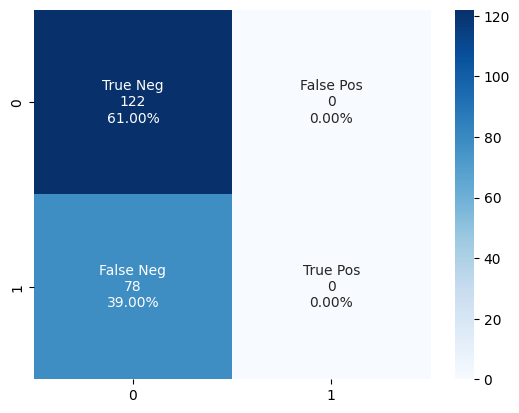

In [9]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df['CS_actual'], df['Snorkel_CS_123'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [10]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.61

In [11]:
# Precision: positive predictive value; of those predicted as CS documents, how many were actually CS documents?
precision = (tp)/(tp+fp)
precision

C:\Users\aharve\AppData\Local\Temp\ipykernel_15344\1976979010.py:2: RuntimeWarning: invalid value encountered in scalar divide
  precision = (tp)/(tp+fp)


nan

In [12]:
# Recall: of those that were actually CS documents, how many were predicted as CS documents?
recall = (tp)/(tp+fn)
recall

0.0

In [13]:
# F1 score: tries to balance precision and recall, with uneven class distribution (large number of actual negs)
f1 = 2*((precision*recall)/(precision+recall))
f1

nan